### n階微分【PyTorch】
### 1万階微分すれば計算グラフがわかる説【PyTorch】
- 理系ヲタでも一万回告白したらさすがに付き合える説を検証してみた【ドリカム/何度でも】歌詞検証

In [1]:
import torch

In [2]:
# x の宣言時にrequires_grad=True がないとエラー
# x = torch.tensor([2.])
# y = x*2 # (dy/dx|x=2) = 2
# print(torch.autograd.grad(y, x))

In [6]:
x = torch.tensor([2.], requires_grad=True)
print(x)

y = x*2 # (dy/dx|x=2) = 2
print(torch.autograd.grad(y, x))

y = x**2 # (dy/dx|x=2) = 4
print(torch.autograd.grad(y, x))

y = x**2 + x*2 + 2 # (dy/dx|x=2) = (2x+2|x=2) = 6
print(torch.autograd.grad(y, x))

# z = torch.autograd.grad(y, x)
# z # yのグラフ情報は消えている

tensor([2.], requires_grad=True)
(tensor([2.]),)
(tensor([4.]),)
(tensor([6.]),)


In [6]:
x = torch.tensor([2.], requires_grad=True)
y = x**2 + x*2 + 2
dy = torch.autograd.grad(y, x, create_graph=True)
dy

(tensor([6.], grad_fn=<ThAddBackward>),)

In [5]:
x = torch.tensor([2.], requires_grad=True)
y = x**2 + x*2 + 2
dy = torch.autograd.grad(y, x, create_graph=True)
ddy = torch.autograd.grad(dy[0], x, create_graph=True)
ddy

(tensor([2.], grad_fn=<ThMulBackward>),)

In [23]:
x = torch.tensor([2.], requires_grad=True)
# y = x**2 + x*2 + 2
y = torch.exp(x)
dy = torch.autograd.grad(y, x, create_graph=True)
ddy = torch.autograd.grad(dy[0], x, create_graph=True)
dddy = torch.autograd.grad(ddy[0], x, create_graph=True)
print(y.item(), dy[0].item(), ddy[0].item(), dddy[0].item())

7.389056205749512 7.389056205749512 7.389056205749512 7.389056205749512


create_graph=Trueにするとretain_graphもTrueになるんだけど、これってメモリを圧迫し続けるの？  
xが消えたら消失してくれるのかな

ターミナルで
```
$ vmstat -SM 1
```
等を実行してメモリ使用量を監視することをおすすめします

In [5]:
import torch
from tqdm import tqdm


N = 1000000

x = torch.tensor([2.], requires_grad=True)
y = torch.exp(x)
Y = []
Y.append(y)

# メモリを2GBほど持っていきます。
for j in tqdm(range(N)):

    dy = torch.autograd.grad(Y[-1], x, create_graph=True)
    Y.append(dy)

100%|██████████| 1000000/1000000 [00:29<00:00, 34434.98it/s]


In [2]:
import torch
from tqdm import tqdm

N = 500000

x = torch.tensor([2.], requires_grad=True)
y = torch.exp(x)
dy = torch.autograd.grad(y, x, create_graph=True)

for i in tqdm(range(N)):
    dy = torch.autograd.grad(dy, x, create_graph=True)

100%|██████████| 500000/500000 [00:14<00:00, 34928.24it/s]


In [ ]:
# 勾配だけdyに保存されている
# 上書きしていってもちゃんと微分できてる。
# createもretainもするけど、明示的に変数を用意して保管しないと普通に消える

In [160]:
import torch

x = torch.tensor([2.], requires_grad=True)
y = x**5

# 5x**4, 20x**3, 60x**2, 120x, 120, 0
# 80, 160, 240, 240, 120, 0

for i in range(6):
    y = torch.autograd.grad(y, x, create_graph=True)
    print(y)

(tensor([80.], grad_fn=<ThMulBackward>),)
(tensor([160.], grad_fn=<ThMulBackward>),)
(tensor([240.], grad_fn=<ThMulBackward>),)
(tensor([240.], grad_fn=<ThMulBackward>),)
(tensor([120.], grad_fn=<ThMulBackward>),)
(tensor([0.]),)


In [35]:
x = torch.Tensor(1)

- 先に関数を作って微分してあとから値を入れることはできぬのだろうか
- 'Define and Run'(Tensorflow, Keras): 静的フレームワーク。ネットワークを固定してから学習
- 'Define by Run'(Chainer, PyTorch, DyNet)：動的フレームワーク。ネットワークは順伝搬後に確定し学習

In [134]:
x = torch.tensor([3.], requires_grad=True)
w1 = torch.tensor([5.], requires_grad=True)
b1 = torch.tensor([2.], requires_grad=True)

y1 = w1*x+b1
print(y1)
print(x.grad)

tensor([17.], grad_fn=<ThAddBackward>)
None


In [135]:
y1.backward(retain_graph=True)
print(x.grad)

tensor([5.])


In [136]:
x.grad

tensor([5.])

In [110]:
w2 = torch.tensor([6.], requires_grad=True)
b2 = torch.tensor([3.], requires_grad=True)

y2 = w2*x+b2 
print(y2)
print(x.grad)

tensor([21.], grad_fn=<ThAddBackward>)
tensor([25.])


In [117]:
y2.backward(retain_graph=True)
print(x.grad) # どんどん足される

tensor([6.])


In [119]:
x.grad.data.zero_()

tensor([0.])

In [125]:
x

tensor([3.], requires_grad=True)

In [124]:
x.sin()

tensor([0.1411], grad_fn=<SinBackward>)

In [120]:
x.grad

tensor([0.])

---

In [126]:
import numpy as np
np.sin(3)

0.1411200080598672

In [128]:
import torch
from torch.autograd import Variable

x = Variable(torch.Tensor([[0]]), requires_grad=True)

for t in range(5):
    y = x.sin() # torch.sin(0)
    y.backward() # cos(0)
    
print(x.grad) # shows 5

x = Variable(torch.Tensor([[0]]), requires_grad=True) 

for t in range(5):
    if x.grad is not None:
        print(t)
        x.grad.data.zero_()
    y = x.sin() 
    y.backward()

print(x.grad) # shows 1

tensor([[5.]])
1
2
3
4
tensor([[1.]])


---



true func:    y = 2x
model func:   y = wx
initial func: y = 1x


------------------------------------------------------------ 
w0 == 1.0


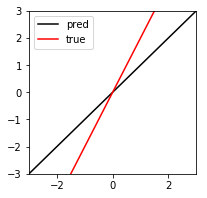

loss: tensor(1., grad_fn=<L1LossBackward>)
grads[0] tensor([-1.], grad_fn=<ThMulBackward>)
------------------------------------------------------------
w1 = w0 - lr*grads[0]
w1 == 1.100000023841858


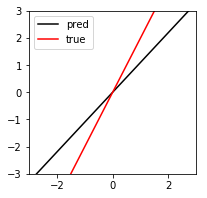

loss: tensor(1.8000, grad_fn=<L1LossBackward>)
grads[0] tensor([-2.], grad_fn=<ThMulBackward>)
------------------------------------------------------------
w2 = w1 - lr*grads[0]
w2 == 1.3000000715255737
del w1


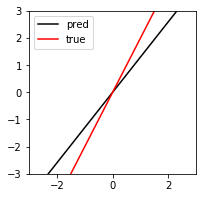

loss: tensor(2.1000, grad_fn=<L1LossBackward>)
grads[0] tensor([-3.], grad_fn=<ThMulBackward>)
------------------------------------------------------------
w3 = w2 - lr*grads[0]
w3 == 1.6000001430511475
del w2


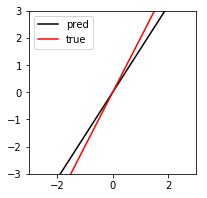



------------------------------------------------------------ 
test
------------------------------------------------------------ 

loss: tensor(1.6000, grad_fn=<L1LossBackward>)

dL/dw0 ==
  grads[0] tensor([-4.], grad_fn=<ThAddBackward>)


In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot(w):
    x = np.linspace(-3,3,4)
    plt.figure(figsize=(3,3)); plt.xlim([-3,3]); plt.ylim([-3,3])
    y = w*x; plt.plot(x,y,"k", label="pred")
    y = 2*x; plt.plot(x,y,"r", label="true")
    plt.legend()
    plt.show()

lr=0.1

loss_fn = torch.nn.L1Loss()


print("\n")
print("true func:    y = 2x")
print("model func:   y = wx")
print("initial func: y = 1x")
print("\n")

#####################################################################

w0 = torch.tensor([1.], requires_grad=True)
print("-"*60, "\nw0 ==", w0.item())
plot(w0.item())

train_x = torch.tensor([1.])
train_y = torch.tensor([2.])

_loss = loss_fn(w0*train_x,train_y) # torch.absとかでもおｋ
print("loss:", _loss) # 1.0
grads = torch.autograd.grad(_loss, w0, create_graph=True)
print("grads[0]", grads[0])

#####################################################################

w1 = w0 - lr*grads[0]
print("-"*60, )
print("w1 = w0 - lr*grads[0]")
print("w1 ==", w1.item())
plot(w1.item())

train_x = torch.tensor([2.])
train_y = torch.tensor([4.])

_loss = loss_fn(w1*train_x,train_y)
print("loss:", _loss) # 1.8
grads = torch.autograd.grad(_loss, w1, create_graph=True)

print("grads[0]", grads[0])

#####################################################################

w2 = w1 - lr*grads[0]
print("-"*60)
print("w2 = w1 - lr*grads[0]")
print("w2 ==", w2.item())
print("del w1")
del w1
plot(w2.item())

train_x = torch.tensor([3.])
train_y = torch.tensor([6.])

_loss = loss_fn(w2*train_x,train_y)
print("loss:", _loss) # 1.8
grads = torch.autograd.grad(_loss, w2, create_graph=True)

print("grads[0]", grads[0])

#####################################################################

w3 = w2 - lr*grads[0]
print("-"*60)
print("w3 = w2 - lr*grads[0]")
print("w3 ==", w3.item())
print("del w2")
del w2

plot(w3.item())

#####################################################################

print("\n"); print("-"*60, "\ntest"); print("-"*60, "\n")

test_x = torch.tensor([4.])
test_y = torch.tensor([8.])

_loss = loss_fn(w3*test_x,test_y)
print("loss:", _loss) # 1.6
print("\ndL/dw0 ==")
grads = torch.autograd.grad(_loss, w0, create_graph=True)

print("  grads[0]", grads[0])

In [9]:
w0

tensor([1.], requires_grad=True)

In [14]:
w1.item()

1.100000023841858